In [1]:
import pandas as pd
wine = pd.read_csv("WineQT.csv")
wine.set_index("Id", inplace=True)
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


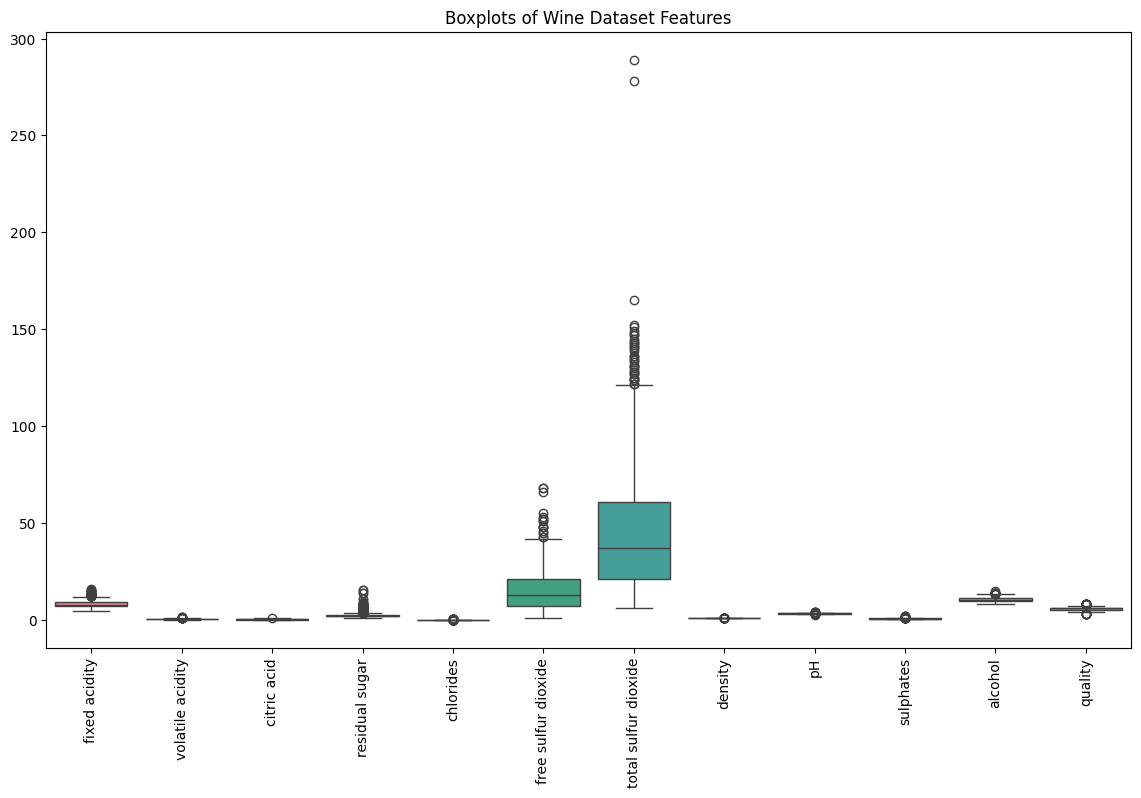

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(data=wine)
plt.title("Boxplots of Wine Dataset Features")
plt.xticks(rotation=90)
plt.show()

In [4]:
# variance of the variables
wine.var()

fixed acidity              3.054088
volatile acidity           0.032268
citric acid                0.038685
residual sugar             1.838512
chlorides                  0.002234
free sulfur dioxide      105.072466
total sulfur dioxide    1074.668067
density                    0.000004
pH                         0.024544
sulphates                  0.029036
alcohol                    1.171147
quality                    0.649353
dtype: float64

In [6]:
import numpy as np
wine["free_sulfur_dioxide_log10"] = wine["free sulfur dioxide"].apply(lambda x: np.log10(x))
wine["total_sulfur_dioxide_log10"] = wine["total sulfur dioxide"].apply(lambda x: np.log10(x))
# Select all columns except for specific ones
excluded_columns = ['free sulfur dioxide', 'total sulfur dioxide']  # replace with actual column names
wine_selected = wine[[col for col in wine.columns if col not in excluded_columns]]
wine_selected.var()

fixed acidity                 3.054088
volatile acidity              0.032268
citric acid                   0.038685
residual sugar                1.838512
chlorides                     0.002234
density                       0.000004
pH                            0.024544
sulphates                     0.029036
alcohol                       1.171147
quality                       0.649353
free_sulfur_dioxide_log10     0.087939
total_sulfur_dioxide_log10    0.092428
dtype: float64

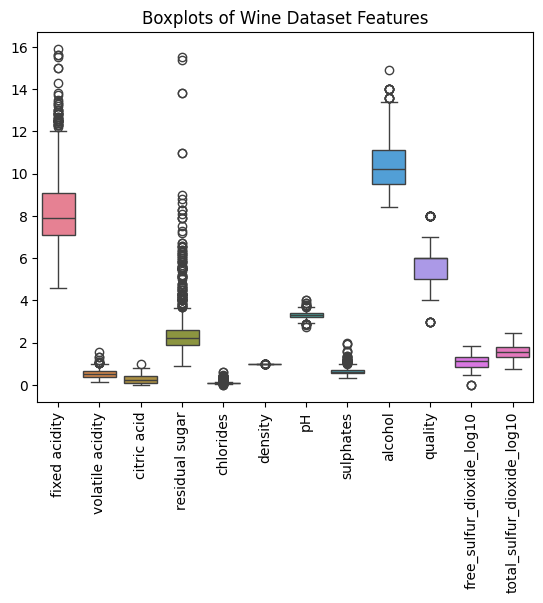

In [7]:
sns.boxplot(data=wine_selected)
plt.title("Boxplots of Wine Dataset Features")
plt.xticks(rotation=90)
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  free_sulfur_dioxide_log10  total_s

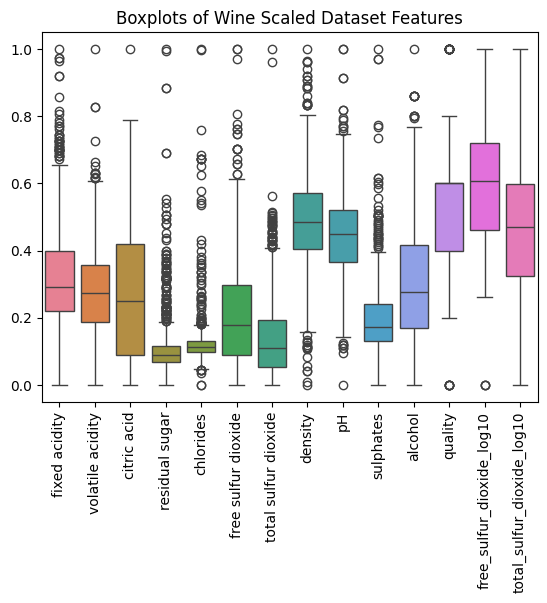

In [9]:
# Example 1: Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Scaling
scaler = MinMaxScaler()
wine_scaled = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns)

print(wine_scaled.head())
sns.boxplot(data=wine_scaled)
plt.title("Boxplots of Wine Scaled Dataset Features")
plt.xticks(rotation=90)
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol   quality  free_sulfur_dioxide_log10  total_

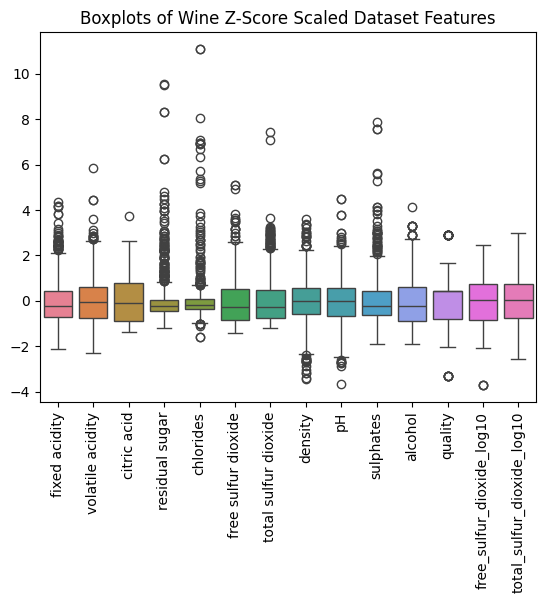

In [10]:
# Example 2: Standardization (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

# Applying Standardization
scaler = StandardScaler()
wine_zscore = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns)

print(wine_zscore.head())
sns.boxplot(data=wine_zscore)
plt.title("Boxplots of Wine Z-Score Scaled Dataset Features")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Handling Missing Values
from sklearn.impute import SimpleImputer

# in this case the original dataset does not have missing values
# lets create a new copy and add some missing value
wine_copy = wine.copy()
wine_copy.shape

wine_copy.iloc[0,1] = np.nan
wine_copy.iloc[3,10] = np.nan
wine_copy.iloc[1000,11] = np.nan
wine_copy.iloc[35,4] = np.nan
wine_copy.iloc[54,9] = np.nan
wine_copy.iloc[888,9] = np.nan
wine_copy.iloc[545,9] = np.nan
wine_copy.iloc[300,10] = np.nan
wine_copy.iloc[567,10] = np.nan
wine_copy.isna().sum()
# Imputation of missing values using the mean
imputer = SimpleImputer(strategy='mean')
wine_imputed = pd.DataFrame(imputer.fit_transform(wine), columns=wine.columns)

#after imputation all values should be different than NA
wine_imputed.isna().sum()

fixed acidity                 0
volatile acidity              0
citric acid                   0
residual sugar                0
chlorides                     0
free sulfur dioxide           0
total sulfur dioxide          0
density                       0
pH                            0
sulphates                     0
alcohol                       0
quality                       0
free_sulfur_dioxide_log10     0
total_sulfur_dioxide_log10    0
dtype: int64

# Feature Interaction (Polynomial Features)
Sometimes, combinations or interactions between features provide more predictive power. You can create polynomial features or manually engineer new features based on domain knowledge.



,age,income
0,25,50000
1,35,100000
2,45,150000
3,55,200000


,age,income,age^2,age income,income^2
0,25.0,50000.0,625.0,1250000.0,2.500000e+09
1,35.0,100000.0,1225.0,3500000.0,1.000000e+10
2,45.0,150000.0,2025.0,6750000.0,2.250000e+10
3,55.0,200000.0,3025.0,11000000.0,4.000000e+10


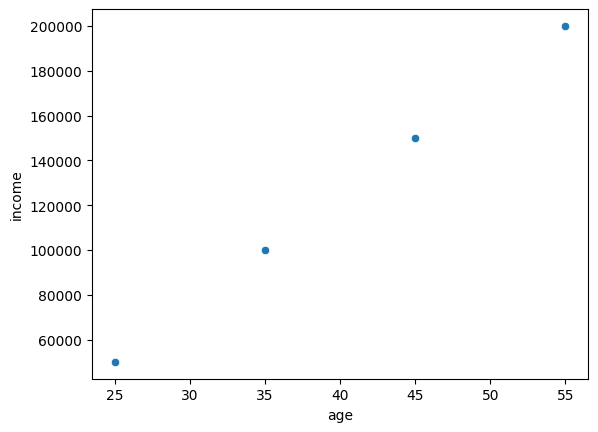

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {'age': [25, 35, 45, 55], 'income': [50000, 100000, 150000, 200000]}
df = pd.DataFrame(data)

display(df)
sns.scatterplot(data=df, x='age', y='income')

# Generate polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = pd.DataFrame(poly.fit_transform(df), columns=poly.get_feature_names_out(df.columns))

display(df_poly)


,age,income
0,25,50000
1,35,100000
2,45,150000
3,550,200000


,age,income
0,25,50000
1,35,100000
2,45,150000


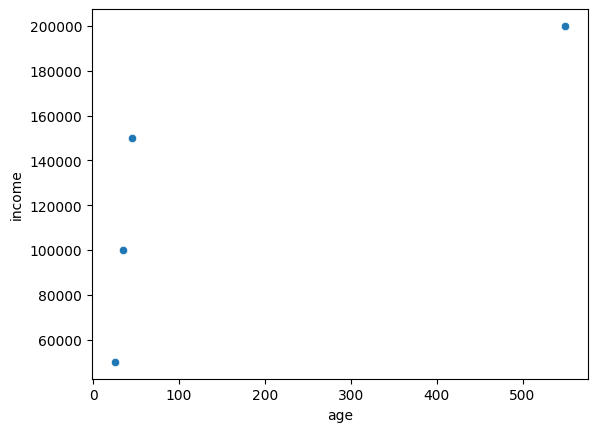

In [14]:
# Outlier Handling

import pandas as pd

# Example data with an outlier
data = {'age': [25, 35, 45, 550], 'income': [50000, 100000, 150000, 200000]}
df = pd.DataFrame(data)
display(df)
sns.scatterplot(data=df, x='age', y='income')
# Identify and remove outliers (using a threshold, e.g., age > 100)
df_no_outliers = df[df['age'] <= 100]

display(df_no_outliers)


In this example, we will create a new feature called BMI (Body Mass Index), which is derived from height and weight. BMI is calculated using the formula:

$BMI = Weight / Height^2$


In [15]:
import pandas as pd

# Create a simple DataFrame with height (in meters) and weight (in kilograms)
data = {
    'height': [1.60, 1.75, 1.82, 1.90, 1.55],  # in meters
    'weight': [55, 70, 85, 95, 50]  # in kilograms
}

df = pd.DataFrame(data)

# Create a new feature for BMI
df['BMI'] = df['weight'] / (df['height'] ** 2)

# Display the DataFrame with the new BMI feature
print(df)


   height  weight        BMI
0    1.60      55  21.484375
1    1.75      70  22.857143
2    1.82      85  25.661152
3    1.90      95  26.315789
4    1.55      50  20.811655


#One Hot Encoding

In [16]:
import pandas as pd

# Example categorical data
data = {'user': [1,2,3,4], 'city': ['New York', 'San Francisco', 'New York', 'Austin'], 'gender': ['M', 'F', 'M', 'F']}
df = pd.DataFrame(data)

display(df)
# Applying one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

display(df_encoded)


,user,city,gender
0,1,New York,M
1,2,San Francisco,F
2,3,New York,M
3,4,Austin,F


,user,city_New York,city_San Francisco,gender_M
0,1,True,False,True
1,2,False,True,False
2,3,True,False,True
3,4,False,False,False


,Feature 1,Feature 2,Feature 3,Label
0,-2.936066,9.515734,5.798065,0
1,-10.339096,7.488546,1.166371,2
2,-8.461031,8.974874,0.695468,2
3,-1.927075,9.902035,5.534211,0
4,2.204123,-7.688564,-5.822686,1
...,...,...,...,...
95,2.750219,-5.834056,-7.222251,1
96,-4.017351,10.113933,4.462147,0
97,-2.801150,6.359110,4.985397,0
98,-10.625999,6.102953,1.353098,2


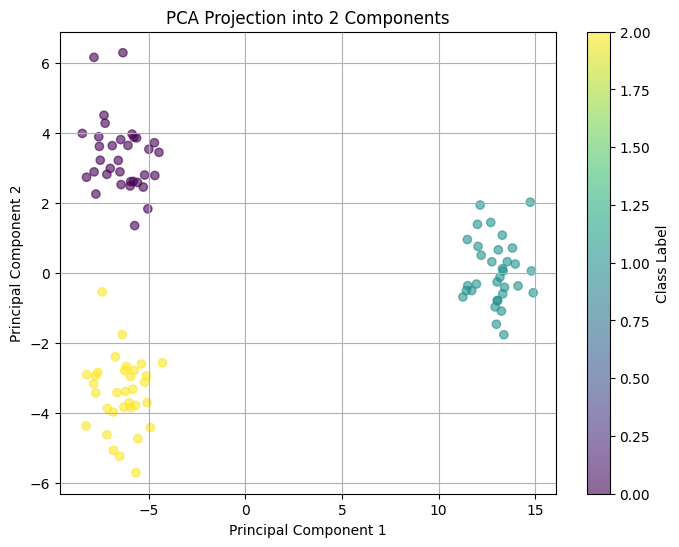

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Step 1: Create a synthetic dataset with 3 features
X, y = make_blobs(n_samples=100, centers=3, n_features=3, random_state=42)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Label'] = y
display(df)
# Step 2: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Label'] = y

# Step 3: Visualize the PCA projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['Label'], cmap='viridis', alpha=0.6)
plt.title('PCA Projection into 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class Label')
plt.grid()
#plt.show()
plt.savefig("PCA.pdf", format="pdf")


In [19]:
from datetime import datetime

# Get the current time
now = datetime.now()
print(now)
# Print time in hours, minutes, seconds, and milliseconds
current_time = now.strftime("%H:%M:%S.%f")  # %f gives microseconds
print(f"Current Time: {current_time[:-3]}")  # Remove last three digits to get milliseconds

2024-10-31 14:55:43.234412
Current Time: 14:55:43.234
